In [1]:
import pandas as pd
tr = pd.read_csv("C:/Users/akaks/Downloads/loan_training_set.csv")

In [2]:
tr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


# Drop Statistically Unimportant columns

In [4]:
tr.drop(labels=['Loan_ID'],axis=1,inplace=True)

In [5]:
tr.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Missing data Treatment

In [6]:
tr.Gender.value_counts()

Male      487
Female    112
Name: Gender, dtype: int64

In [7]:
tr.Gender = tr.Gender.fillna("Male")

In [8]:
tr.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
tr.Married = tr.Married.fillna("Yes")

In [10]:
tr.Dependents = tr.Dependents.str.replace("+","")

<ipython-input-10-ecb312466e7b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tr.Dependents = tr.Dependents.str.replace("+","")


In [11]:
tr.Dependents.value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [12]:
tr.Dependents = tr.Dependents.fillna("0")

In [13]:
tr.Education.value_counts()

Graduate        479
Not Graduate    134
Name: Education, dtype: int64

In [14]:
tr.Education = tr.Education.fillna("Graduate")

In [15]:
tr.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
tr.Self_Employed = tr.Self_Employed.fillna("No")

In [17]:
x = round(tr.ApplicantIncome.mean(),0)

In [18]:
tr.ApplicantIncome = tr.ApplicantIncome.fillna(x)

In [19]:
x = round(tr.CoapplicantIncome.mean(),0)

In [20]:
tr.CoapplicantIncome = tr.CoapplicantIncome.fillna(x)

In [21]:
x = round(tr.LoanAmount.mean(),0)

In [22]:
tr.LoanAmount = tr.LoanAmount.fillna(x)

In [23]:
x = tr.Loan_Amount_Term.mode()[0]

In [24]:
tr.Loan_Amount_Term = tr.Loan_Amount_Term.fillna(x)

In [25]:
tr.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
tr.Credit_History = tr.Credit_History.fillna(1)

In [27]:
tr.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
Y = tr.Loan_Status

In [29]:
X = tr.drop("Loan_Status",axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew= le.fit_transform(Y)

# Exploratory Data Analysis

In [31]:
cat = []
con = []
for i in X.columns:
    if X[i].dtype == "object":
        cat.append(i)
    else:
        con.append(i)

In [32]:
imp_cols = []

In [33]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

In [34]:
for i in con:
    q = ANOVA(tr,"Loan_Status",i)
    print("-------------")
    print("Loan_Status vs",i)
    print("Pval: ",q)
    if(q < 0.15):
        imp_cols.append(i)

-------------
Loan_Status vs ApplicantIncome
Pval:  0.9025
-------------
Loan_Status vs CoapplicantIncome
Pval:  0.1424
-------------
Loan_Status vs LoanAmount
Pval:  0.3686
-------------
Loan_Status vs Loan_Amount_Term
Pval:  0.5771
-------------
Loan_Status vs Credit_History
Pval:  0.0


In [35]:
imp_cols

['CoapplicantIncome', 'Credit_History']

In [36]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

In [37]:
for i in cat:
    if(X[i].dtypes=="object"):
        x = chisquare(tr,"Loan_Status",i)
        if(x < 0.05):
            print("Loan_Status vs ",i,"-->",x)
            imp_cols.append(i)

Loan_Status vs  Married --> 0.029608580862582116
Loan_Status vs  Education --> 0.04309962129357355
Loan_Status vs  Property_Area --> 0.0021360187811644915


In [38]:
imp_cols

['CoapplicantIncome',
 'Credit_History',
 'Married',
 'Education',
 'Property_Area']

# Preprocessing

In [39]:
X.skew()

Dependents           1.015551
ApplicantIncome      6.538869
CoapplicantIncome    7.492000
LoanAmount           2.727127
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [40]:
from numpy import log

def skew_rem(df,col):
    q = []
    for i in df[col]:
        if(i != 0):
            q.append(log(i))
        else:
            q.append(i)
    df[col] = q

In [41]:
skew_rem(X,'CoapplicantIncome')

In [42]:
skew_rem(X,'ApplicantIncome')

In [43]:
X.skew()

Dependents           1.015551
ApplicantIncome      0.477560
CoapplicantIncome   -0.172920
LoanAmount           2.727127
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [44]:
from ML_Fun import data_prep
Xnew = data_prep(X[imp_cols])

In [45]:
Xnew

,CoapplicantIncome,Credit_History,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.107731,0.411733,1,0,1,0,0,0,1
1,0.782215,0.411733,0,1,1,0,1,0,0
2,-1.107731,0.411733,0,1,1,0,0,0,1
3,0.897656,0.411733,0,1,0,1,0,0,1
4,-1.107731,0.411733,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
609,-1.107731,0.411733,1,0,1,0,1,0,0
610,-1.107731,0.411733,0,1,1,0,1,0,0
611,0.307594,0.411733,0,1,1,0,0,0,1
612,-1.107731,0.411733,0,1,1,0,0,0,1


# Dividing Data into training and testing set

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.8,random_state=21)

# Create a ML Model

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)

# Create Predictions

In [48]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

In [49]:
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

In [50]:
tr_acc

0.8442622950819673

In [51]:
ts_acc

0.8008130081300813

# Try Tree Model

In [52]:
X_ = data_prep(X)

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_,Y,test_size=0.2,random_state=21)

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain,ytrain)

tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print(tr_acc)
print(ts_acc)

1.0
0.7235772357723578


In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
def tree(dtc):
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    return tr_acc , ts_acc

In [56]:
tree(dtc)

(1.0, 0.7154471544715447)

In [57]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,max_depth=i)
    print(tree(dtc))

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.8211382113821138)
(0.8268839103869654, 0.7886178861788617)
(0.8370672097759674, 0.8048780487804879)
(0.8553971486761711, 0.7886178861788617)
(0.8737270875763747, 0.7642276422764228)
(0.8920570264765784, 0.7560975609756098)
(0.90020366598778, 0.7479674796747967)
(0.9226069246435845, 0.7560975609756098)
(0.9389002036659878, 0.6829268292682927)
(0.955193482688391, 0.6910569105691057)
(0.9613034623217923, 0.6910569105691057)
(0.9735234215885947, 0.6991869918699187)
(0.9837067209775967, 0.7154471544715447)
(0.9918533604887984, 0.7154471544715447)
(0.9979633401221996, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)
(1.0, 0.6910569105691057)


In [58]:
for i in range(2,30,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_leaf=i)
    print(tree(dtc))

(0.9409368635437881, 0.6910569105691057)
(0.9144602851323829, 0.7073170731707317)
(0.8859470468431772, 0.6910569105691057)
(0.8757637474541752, 0.7235772357723578)
(0.8574338085539714, 0.6829268292682927)
(0.8472505091649695, 0.7154471544715447)
(0.8411405295315683, 0.7154471544715447)
(0.8411405295315683, 0.7235772357723578)
(0.8309572301425662, 0.7560975609756098)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8309572301425662, 0.7723577235772358)
(0.8289205702647657, 0.7723577235772358)
(0.8309572301425662, 0.7560975609756098)
(0.8268839103869654, 0.7479674796747967)
(0.8228105906313645, 0.7560975609756098)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.7073170731707317)
(0.814663951120163, 0.6991869918699187)
(0.8105906313645621, 0.6829268292682927)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8085539714867617, 0.7723577235772358)
(0.8065173116089613,

In [59]:
for i in range(2,40,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=21,min_samples_split=i)
    print(tree(dtc))

(1.0, 0.6910569105691057)
(0.9898167006109979, 0.6747967479674797)
(0.9694501018329938, 0.7154471544715447)
(0.955193482688391, 0.7235772357723578)
(0.9368635437881874, 0.6747967479674797)
(0.9205702647657841, 0.6666666666666666)
(0.9164969450101833, 0.6747967479674797)
(0.9164969450101833, 0.6747967479674797)
(0.9042769857433809, 0.6829268292682927)
(0.9022403258655805, 0.6829268292682927)
(0.90020366598778, 0.6829268292682927)
(0.90020366598778, 0.6829268292682927)
(0.8940936863543788, 0.6991869918699187)
(0.8879837067209776, 0.6747967479674797)
(0.8879837067209776, 0.6747967479674797)
(0.8879837067209776, 0.6747967479674797)
(0.8879837067209776, 0.6747967479674797)
(0.8859470468431772, 0.6829268292682927)
(0.8859470468431772, 0.6829268292682927)
(0.879837067209776, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6910569105691057)
(0.8778004073319755, 0.6991869918699187)
(0.8757637474541752, 0.6991869918699187)
(0.8737270875763747, 0.69918699186991

# Try Adaboost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=30)
tree(adb)

(0.8981670061099797, 0.7235772357723578)

In [61]:
for i in range(2,30):
    adb = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=i)
    print(tree(adb))
    

(0.814663951120163, 0.8211382113821138)
(0.814663951120163, 0.7804878048780488)
(0.8167006109979633, 0.7723577235772358)
(0.8187372708757638, 0.7560975609756098)
(0.8289205702647657, 0.7154471544715447)
(0.8268839103869654, 0.7154471544715447)
(0.8329938900203666, 0.7235772357723578)
(0.835030549898167, 0.7235772357723578)
(0.8329938900203666, 0.7154471544715447)
(0.835030549898167, 0.6991869918699187)
(0.8391038696537678, 0.6991869918699187)
(0.8411405295315683, 0.7073170731707317)
(0.8411405295315683, 0.6991869918699187)
(0.8472505091649695, 0.6910569105691057)
(0.8513238289205702, 0.6829268292682927)
(0.8574338085539714, 0.6910569105691057)
(0.8635437881873728, 0.6747967479674797)
(0.8635437881873728, 0.6747967479674797)
(0.8655804480651731, 0.6910569105691057)
(0.869653767820774, 0.6666666666666666)
(0.8818737270875764, 0.6991869918699187)
(0.8818737270875764, 0.7154471544715447)
(0.8839103869653768, 0.7154471544715447)
(0.8879837067209776, 0.7073170731707317)
(0.8839103869653768, 

In [62]:
dtc = DecisionTreeClassifier(random_state=21,max_depth=2)
model = dtc.fit(X_,Y)

# Make Predictions using Best Model

In [63]:
ts = pd.read_csv("C:/Users/akaks/Downloads/testing_set.csv")

In [64]:
ts.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [65]:
ts

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [66]:
from ML_Fun import replacer
replacer(ts)

In [67]:
ts

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [68]:
X = ts.drop("Loan_ID",axis=1)

In [69]:
from ML_Fun import data_prep
Xnew = data_prep(X)

In [70]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502774,0.418877,-0.593671,0.270603,0.00000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.311909,-0.673335,-0.955139,0.270603,0.47918,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.162439,0.088982,-0.380077,0.270603,0.47918,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,-0.132056,-0.369180,-0.347216,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,-0.317211,0.181644,-0.166482,0.270603,0.00000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.039641,0.353241,0.359289,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [71]:
pred = model.predict(Xnew)

In [72]:
ts['Predicted_Loan_Status'] = pred

In [73]:
ts

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y


In [74]:
pd.DataFrame([Xnew.columns,dtc.feature_importances_]).T

,0,1
0,ApplicantIncome,0.0
1,CoapplicantIncome,0.042743
2,LoanAmount,0.020849
3,Loan_Amount_Term,0.0
4,Credit_History,0.936407
5,Gender_Female,0.0
6,Gender_Male,0.0
7,Married_No,0.0
8,Married_Yes,0.0
9,Dependents_0,0.0


# Identify Customer Segments

In [75]:
X = tr[['CoapplicantIncome','LoanAmount','Credit_History']]

In [76]:
X

,CoapplicantIncome,LoanAmount,Credit_History
0,0.0,146.0,1.0
1,1508.0,128.0,1.0
2,0.0,66.0,1.0
3,2358.0,120.0,1.0
4,0.0,141.0,1.0
...,...,...,...
609,0.0,71.0,1.0
610,0.0,40.0,1.0
611,240.0,253.0,1.0
612,0.0,187.0,1.0


In [77]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [78]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=4)
model = KM.fit(Xnew)

In [79]:
X['Cluster'] = model.labels_

<ipython-input-79-6f1db0f3efd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = model.labels_


In [80]:
X

,CoapplicantIncome,LoanAmount,Credit_History,Cluster
0,0.0,146.0,1.0,0
1,1508.0,128.0,1.0,0
2,0.0,66.0,1.0,0
3,2358.0,120.0,1.0,0
4,0.0,141.0,1.0,0
...,...,...,...,...
609,0.0,71.0,1.0,0
610,0.0,40.0,1.0,0
611,240.0,253.0,1.0,3
612,0.0,187.0,1.0,0


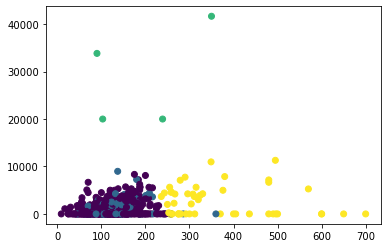

In [81]:
import matplotlib.pyplot as plt
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=model.labels_)

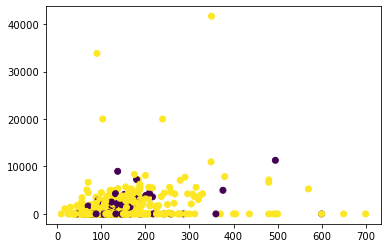

In [82]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=X.Credit_History)

In [83]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
w = le.fit_transform(tr.Loan_Status)

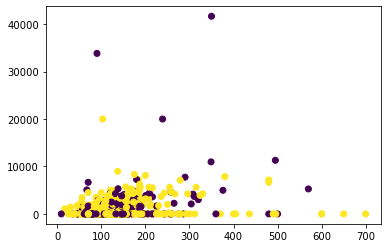

In [84]:
plt.scatter(X.LoanAmount,X.CoapplicantIncome,c=w)

# If customer is not eligible for the input required amount and duration:

#### 1) what can be amount for the given duration?

In [179]:
P1 = tr[tr.Loan_Status=='Y']

In [180]:
P2 = ts[ts.Predicted_Loan_Status=='Y']

In [181]:
P2 = P2.rename({"Predicted_Loan_Status":"Loan_Status"},axis=1)

In [182]:
P2.drop("Loan_ID",axis=1,inplace=True)

In [183]:
trd = pd.concat([P1,P2])

In [208]:
trd.Dependents = trd.Dependents.str.replace('+',"")

<ipython-input-208-3f61ed13c867>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  trd.Dependents = trd.Dependents.str.replace('+',"")


In [210]:
from ML_Fun import replacer
replacer(trd)

In [211]:
cat = []
con = []
for i in trd.columns:
    if trd[i].dtype =='object':
        cat.append(i)
    else:
        con.append(i)

In [212]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [213]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [214]:
cat.remove('Loan_Status')
con.remove("LoanAmount")

In [215]:
Y = trd[['LoanAmount']]

In [216]:
X = trd.drop(labels=['LoanAmount','Loan_Status'],axis=1)

In [217]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban


In [218]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
X2.index = range(0,718)

In [219]:
Xnew = X1.join(X2)

In [220]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.116423,-0.807851,0.295101,0.158234,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.396131,-0.807851,0.295101,0.158234,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
2,-0.471152,0.559417,0.295101,0.158234,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
3,0.143589,-0.807851,0.295101,0.158234,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,0.038704,1.625166,0.295101,0.158234,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,-0.214605,0.222529,0.295101,0.158234,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
714,-0.187799,-0.396743,0.295101,0.158234,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
715,-0.351154,0.347774,0.295101,-1.534893,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
716,-0.036318,0.579711,0.295101,0.158234,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [221]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.8,random_state=21)

In [222]:
trd.corr()[['LoanAmount']]

,LoanAmount
ApplicantIncome,0.584511
CoapplicantIncome,0.140606
LoanAmount,1.000000
Loan_Amount_Term,0.058561
Credit_History,-0.078449


In [223]:
for i in X.columns:
    if(X[i].dtypes == "object"):
        print("------------------------")
        print("Loan AMt vs",i)
        print(ANOVA(trd,i,"LoanAmount"))

------------------------
Loan AMt vs Gender
0.0036
------------------------
Loan AMt vs Married
0.0
------------------------
Loan AMt vs Dependents
0.0003
------------------------
Loan AMt vs Education
0.0
------------------------
Loan AMt vs Self_Employed
0.0004
------------------------
Loan AMt vs Property_Area
0.7661


In [224]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)

print(tr_err)
print(ts_err)

34.46008528472513
39.62352465035779


# Preparing Data for Prediction

In [225]:
test = ts[ts.Predicted_Loan_Status=="N"]

In [226]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.000000,Urban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.000000,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N
340,LP002860,Male,Yes,0,Graduate,Yes,2623,4831,122.0,180.0,1.000000,Semiurban,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,0.825444,Rural,N


In [227]:
from ML_Fun import replacer
replacer(test)

In [228]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(test[con]),columns=con)
X2 = pd.get_dummies(test[cat])
X2.index = range(0,71)

In [229]:
Xnew = X1.join(X2)

In [230]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-0.120253,-0.703445,0.191007,-0.449774,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
1,2.635022,-0.703445,0.191007,-0.449774,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
2,1.655790,1.175774,0.191007,2.291131,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
3,-1.409836,4.994035,0.191007,-0.449774,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
4,-0.363150,-0.703445,0.191007,-0.449774,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.029938,-0.149602,0.191007,-0.449774,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
67,-0.538263,0.443410,-2.321775,2.291131,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0
68,-0.283071,-0.236726,0.191007,-0.449774,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
69,-0.651238,2.857480,0.191007,1.812689,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0


In [233]:
Predicted_Loan_Amount = model.predict(Xnew)

In [237]:
ts[ts.Predicted_Loan_Status=='N']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.000000,Urban,N
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.000000,Rural,N
35,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N
340,LP002860,Male,Yes,0,Graduate,Yes,2623,4831,122.0,180.0,1.000000,Semiurban,N
346,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,0.825444,Rural,N


# b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)


In [239]:
test = ts[ts.Loan_Amount_Term <= 240]

In [242]:
test.shape

(34, 13)

In [243]:
test.index = range(0,34)

In [244]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.000000,Urban,Y
1,LP001083,Male,No,3+,Graduate,No,4166,0,40.0,180.0,0.825444,Urban,Y
2,LP001115,Male,No,0,Graduate,No,1300,3470,100.0,180.0,1.000000,Semiurban,Y
3,LP001124,Female,No,3+,Not Graduate,No,2083,0,28.0,180.0,1.000000,Urban,Y
4,LP001176,Male,No,0,Graduate,No,2942,2382,125.0,180.0,1.000000,Urban,Y
5,LP001208,Male,Yes,2,Graduate,No,7350,4029,185.0,180.0,1.000000,Urban,Y
6,LP001298,Male,Yes,2,Graduate,No,4116,1000,30.0,180.0,1.000000,Urban,Y
7,LP001321,Male,Yes,2,Graduate,No,3613,3539,134.0,180.0,1.000000,Semiurban,Y
8,LP001324,Male,Yes,3+,Graduate,No,4720,0,90.0,180.0,1.000000,Semiurban,Y
9,LP001375,Male,Yes,1,Graduate,No,4083,1775,139.0,60.0,1.000000,Urban,Y


In [245]:
Y = tr[['Loan_Amount_Term']]

In [248]:
X = tr.drop(labels=['Loan_Amount_Term','Loan_Status'],axis=1)

In [249]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,146.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5406.0,1508.0,128.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,1.0,Urban


In [250]:
Xnew = data_prep(X)

In [251]:
Xnew

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,-0.004733,0.411733,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000075,-0.038610,-0.219097,0.411733,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957465,0.411733,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462413,0.252103,-0.314371,0.411733,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.097389,-0.554368,-0.064278,0.411733,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410479,-0.554368,-0.897919,0.411733,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,-0.212902,-0.554368,-1.267103,0.411733,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0.436842,-0.472284,1.269547,0.411733,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0.356729,-0.554368,0.483543,0.411733,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [252]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.8,random_state=21)

In [253]:
model = lr.fit(xtrain,ytrain)

In [256]:
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

tr_err = mean_absolute_error(ytrain,pred_tr)
ts_err = mean_absolute_error(ytest,pred_ts)

print(tr_err)
print(ts_err)

42.42692162706634
46.13919415842595


In [257]:
replacer(test)

In [258]:
X  = test.drop(labels=['Loan_ID','Loan_Amount_Term','Predicted_Loan_Status'],axis=1)

In [260]:
Xnew = data_prep(X)

In [262]:
Xnew.shape

(34, 19)

In [263]:
model.predict(Xnew)

array([[397.14534713],
       [313.54972078],
       [371.51939402],
       [294.69783856],
       [362.61050338],
       [367.2896831 ],
       [332.68747626],
       [373.17869669],
       [295.37684829],
       [325.39452911],
       [344.72347836],
       [351.05535716],
       [338.3525463 ],
       [352.08513202],
       [355.11639382],
       [288.68292713],
       [373.23942326],
       [369.16416023],
       [377.94303578],
       [337.77193519],
       [316.0587533 ],
       [303.91137176],
       [344.70228038],
       [356.18040004],
       [377.30850726],
       [357.89769709],
       [342.46995103],
       [276.53743978],
       [378.3396357 ],
       [289.39113026],
       [295.22033812],
       [274.41428269],
       [305.68150612],
       [336.54269531]])